# TWEET CLASSIFICATION: NATURAL LANGUAGE PROCESSING

### Preamble imports

In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

### MongoDB

In [2]:
from pymongo import MongoClient #python to talk to Python server
import requests
import json
from pprint import pprint

In [3]:
client = MongoClient() #starts mongo client to python
db = client.tweetsdb #gets into the mongo server and use tweetsdb

republicans = db.republicans #create collections
democrats = db.democrats
trump = db.trump
obama = db.obama
 
# republicans.delete_many({}); #delete all existing data
# democrats.delete_many({});
# trump.delete_many({});
# obama.delete_many({});


### Twitter API

In [4]:
with open('twitter_config') as twitter_file:
    twitter_config = json.load(twitter_file)

def twitter_api_url(screen_name, count, max_id=None):
    twitter_url = 'https://api.twitter.com/1.1/statuses/user_timeline.json?' +\
    'screen_name=' + screen_name + '&count=' + str(count)
        
    if max_id is not None:
        twitter_url += '&max_id=' + str(max_id) #add max ID

    return twitter_url


def get_twitter_json(screen_name, count, iterations, collection): #collection: republicans, democrats, others
    results = []
    max_id = None
    
    for _ in range(iterations):
        
        twitter_header = {'Authorization': 'Bearer ' + twitter_config['access_token']}
        twitter_response = requests.get(twitter_api_url(screen_name, count, max_id), headers=twitter_header)
        
        json_tweets = twitter_response.json()
#         print(len(json_tweets))

        max_id = json_tweets[-1]['id'] #max will pass back up to twitter_api_url next iteration.
#         print(max_id)

#         print([tweet['id'] for tweet in json_tweets]) #this is to check that tweets are unique.
        json_tweets.pop()   #pop off the last tweet since it will be added from then next iteration.

        collection.insert_many(json_tweets) #now insert into collection tweets
#         print(json_tweets) #show what you are adding to the mongoDB

    return True

In [5]:
#Get info from specific twitter accounts
def twitter_accounts(screen_names, collection):
    for screen_name in screen_names:
        get_twitter_json(screen_name, 200, 16, collection)
    return True

### Load in the Data

In [6]:
republican_accounts1 = ['GOP', 'Reince', 'seanhannity',
                       'SenateGOP','HouseGOP', 'SenJohnMcCain', 
                       'AnnCoulter', 'SpeakerRyan', 'mike_pence', 
                      'marcorubio', 'JECRepublicans', 'RandPaul',
                      'CRNC', 'SpeakerBoehner', 'HASCRepublicans']
republican_accounts2 = ['yrnf', 'tedcruz', 'jasoninthehouse',
                       'JohnCornyn', 'SarahPalinUSA', 'DanaPerino', 
                       'SenTedCruz', 'GovMikeHuckabee', 'SenAlexander', 
                       'senrobportman', 'newtgingrich', 'JoeNBC', 
                        'FoxNews', 'RepublicanStudy', 'KarlRove']
republican_accounts3 = ['RealBenCarson', 'GovernorPerry', 'RJC', 
                       'RickSantorum', 'CR', 'GOPLeader', 
                       'MicheleBachmann', 'CarlyFiorina', 'IngrahamAngle',
                      'oreillyfactor', 'foxheadlines', 'foxandfriends',
                      'ericbolling', 'greta', 'KatrinaCampins']
republican_accounts4 = ['foxnation', 'FoxNewsSunday', 'foxnewspolitics',
                      'FoxNewsInsider', 'SenMikeLee', 'cathymcmorris', 
                       'foxnewsalert', 'LucasFoxNews', 'BretBaier', 
                       'MichelleMalkin', 'MichaelJohns', 'stuartayresmp',
                       'BrielleMissNJ', 'JohnKasich', 'dbongino']

In [7]:
len(republican_accounts2)

15

In [33]:
# twitter_accounts(republican_accounts1, republicans) #get tweets from API

True

In [35]:
# twitter_accounts(republican_accounts2, republicans)

True

In [36]:
# twitter_accounts(republican_accounts3, republicans)

True

In [37]:
# twitter_accounts(republican_accounts4, republicans)

True

In [8]:
democratic_accounts1 = ['HillaryClinton', 'TheDemocrats','ObamaWhiteHouse', 
                       'SenateDems', 'HouseDemocrats', 'VP44', 
                       'NancyPelosi', 'PressSec44', 'SenSanders', 
                       'FLOTUS44', 'CollegeDems', 'AlaskaDemocrats', 
                       'MichiganDems', 'SenatorReid', 'SenSchumer']
democratic_accounts2 = ['texasdemocrats', 'washdems', 'DemsAbroad', 
                       'PADems', 'SenGillibrand', 'CNNMoney', 
                      'LADemos', 'WhipHoyer', 'keithellison',
                       'billmaher', 'KeithOlbermann', 'maddow', 
                       'chrislhayes', 'CNN', 'CNNPolitics']
democratic_accounts3 = ['CNNnewsroom', 'TheLeadCNN', 'danmericaCNN',
                      'CNNPR', 'jaketapper', 'Acosta', 
                       'KilloughCNN', 'Deena_CNN', 'cnnbrk', 
                      'cnntech', 'mkraju', 'DylanByers', 
                        'Phil_Mattingly', 'jmoorheadcnn', 
                        'mj_lee', 'betsy_klein', 'NewDay']
democratic_accounts4 = ['jeffzeleny', 'JDiamond1', 'jimsciutto', 
                        'tomlobianco', 'KateBennett_DC', 'DavidChalian', 
                        'SaraMurray', 'teddyschleifer', 'nowthised', 
                        'Arianedevogue', 'DHBerman', 'arwaCNN', 
                        'wolfblitzer','andersoncooper', 'GeorgeHowellCNN']

In [9]:
len(democratic_accounts1)

15

In [20]:
# twitter_accounts(democratic_accounts1, democrats) #get tweets from API

True

In [21]:
# twitter_accounts(democratic_accounts2, democrats)

True

In [22]:
# twitter_accounts(democratic_accounts3, democrats)

True

In [23]:
# twitter_accounts(democratic_accounts4, democrats)

True

In [56]:
# twitter_accounts(['realDonaldTrump'], trump)

True

In [57]:
# twitter_accounts(['BarackObama'], obama)

True

In [5]:
republican_data = list(republicans.find({ }, { "text": 1, "_id": 0}))
#query MongoDB

In [6]:
democrat_data = list(democrats.find({ }, { "text": 1, "_id": 0}))
#query MongoDB

In [7]:
trump_data = list(trump.find({ }, { "text": 1, "_id": 0}))

In [8]:
obama_data = list(obama.find({ }, { "text": 1, "_id": 0}))

In [9]:
republican_data[0]

{'text': '@stephen_lietz Best of luck on your venture, Stephen!'}

In [15]:
len(republican_data) #check how many tweets we have

190535

In [16]:
len(democrat_data)

197255

In [17]:
len(trump_data)

3183

In [18]:
len(obama_data)

3184

### Create Pandas Data Frame

In [10]:
from pandas.io.json import json_normalize #put tweets into a DF

In [11]:
republican_df = json_normalize(republican_data) #normalize json to pandas DF

In [12]:
republican_df['party'] = 'republican' #make another column so I know what party
republican_df['party_num'] = 1

In [13]:
democrat_df = json_normalize(democrat_data)

In [14]:
democrat_df['party'] = 'democratic'
democrat_df['party_num'] = 0

In [15]:
trump_df = json_normalize(trump_data)
trump_df['party'] = 'republican'
trump_df['party_num'] = 1

obama_df = json_normalize(obama_data)
obama_df['party'] = 'democrat'
obama_df['party_num'] = 0

In [16]:
republican_df.describe() #let's see if it's entering the data properly

,party_num
count,190535.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [17]:
democrat_df.describe()

,party_num
count,197255.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [18]:
republican_df.head()

,text,party,party_num
0,"@stephen_lietz Best of luck on your venture, S...",republican,1
1,@SmithHoke Thanks for your support!,republican,1
2,Big Ohio endorsement coming. Stay tuned...,republican,1
3,"As Ohio goes, so goes the nation.",republican,1
4,Tune in to MSNBC NOW to see John Kasich's town...,republican,1


In [19]:
democrat_df.head()

,text,party,party_num
0,"RT @KyungLahCNN: 5 years later, Fukushima via ...",democratic,0
1,RT @AshleyCodianni: We chatted w/ @HillaryClin...,democratic,0
2,"RT @CNN: The crisis in Flint, Michigan, is not...",democratic,0
3,RT @moody: Let us all take a moment and rememb...,democratic,0
4,RT @JDiamond1: Wow. Will help @BernieSanders w...,democratic,0


In [20]:
df = pd.concat([republican_df, democrat_df]).reset_index(drop=True) #bring them together.
df.head() #bring the two parties together

,text,party,party_num
0,"@stephen_lietz Best of luck on your venture, S...",republican,1
1,@SmithHoke Thanks for your support!,republican,1
2,Big Ohio endorsement coming. Stay tuned...,republican,1
3,"As Ohio goes, so goes the nation.",republican,1
4,Tune in to MSNBC NOW to see John Kasich's town...,republican,1


In [21]:
df_test = pd.concat([trump_df, obama_df]).reset_index(drop=True) #bring them together.
df.head()

,text,party,party_num
0,"@stephen_lietz Best of luck on your venture, S...",republican,1
1,@SmithHoke Thanks for your support!,republican,1
2,Big Ohio endorsement coming. Stay tuned...,republican,1
3,"As Ohio goes, so goes the nation.",republican,1
4,Tune in to MSNBC NOW to see John Kasich's town...,republican,1


In [22]:
republican_df.iloc[0]['text']

'@stephen_lietz Best of luck on your venture, Stephen!'

### Text Processing

In [23]:
def to_string(data_frame_col): #append each row as a string to one list.
    example = []
    for row in data_frame_col:
        example.append(str(row))
    return example
#this is because future vectorizers only take in a list of strings.

In [24]:
stringed_tweets = to_string(df['text'])

In [25]:
stringed_tweets_test = to_string(df_test['text'])

In [26]:
example = stringed_tweets[0:5] #sanity check.
example

['@stephen_lietz Best of luck on your venture, Stephen!',
 '@SmithHoke Thanks for your support!',
 'Big Ohio endorsement coming. Stay tuned...',
 'As Ohio goes, so goes the nation.',
 "Tune in to MSNBC NOW to see John Kasich's town hall from Lima."]

In [27]:
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

In [28]:
tfidf = TfidfVectorizer(stop_words="english", 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", #regular expression, filter by two letters surrounded by word boundaries.
                        min_df=10, 
                       max_df=10000) #minimum document frequency, ignores words that occur less than 10x

In [29]:
tfidf_mat = tfidf.fit_transform(stringed_tweets) #this is unsupervised training corpus.
#fit_transform initializes the tfidfvectorizer function to count occurrences
#of stringed_tweets; it then applies the transformation and stores as tfidf_vecs


### Dimension Reduction/Feature Extraction

In [30]:
lsa = TruncatedSVD(50, algorithm='randomized')
reduced_mat = lsa.fit_transform(tfidf_mat) #this fit_transform does:
#1) it learns a reduced matrix that maps topics to words
reduced_mat = Normalizer(copy=False).fit_transform(reduced_mat)
#2) it then applies this transformation and stores it, by norm of 1
#this is providing the TALL AND SKINNY MATRIX (docs by topics)

In [ ]:
#let's print out this TALL AND SKINNY matrix
pd.DataFrame(reduced_mat.round(5), index = stringed_tweets, 
             columns = range(1,reduced_mat.shape[1]+1)).head(2)

In [ ]:
# let's show the SHORT AND WIDE matrix that is TOPICS BY FEATURE TERMS
pd.DataFrame(lsa.components_.round(5), index = 
             range(1,reduced_mat.shape[1]+1), 
             columns=tfidf.get_feature_names()).head()

In [31]:
tfidf_mat.shape, reduced_mat.shape
#again, reduced_mat is the "tall skinny" matrix T

((387790, 20990), (387790, 50))

In [32]:
lsa.components_.shape #this is "short and wide" matrix W

(50, 20990)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


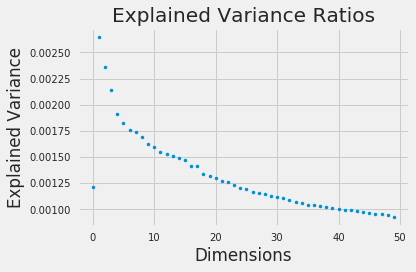

In [43]:
#let's create our eigenvalue plot (divided by sum of eigenvalues)
plt.plot(lsa.explained_variance_ratio_, '.');
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratios')
plt.tight_layout()

### Exploring most important word in each topic.

In [44]:
terms = np.array(tfidf.get_feature_names())
#this tells us the column names that will be our terms

In [45]:
#let's check out what the highest valued word is for each topic.
def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]

In [46]:
for i in range(10):
    print("topic {}".format(i))
    print(get_topical_terms(lsa.components_,i,terms, 20))
#somehow get rid of words like "https" and "rt"

topic 0
['great' 'thank' 'live' 'watch' 'tonight' 'thanks' 'house' 'time'
 'realdonaldtrump' 'news' 'day' 'vote' 'et' 'gop' 'hillary' 'potus'
 'america' 'don' 'll' 'make']
topic 1
['thank' 'great' 'support' 'thanks' 'happy' 'service' 'friend' 'birthday'
 'watching' 'love' 'kind' 'appreciate' 'sir' 'work' 'god' 'katrinacampins'
 'honor' 'words' 'amazing' 'having']
topic 2
['thanks' 'great' 'watching' 'support' 'having' 'good' 'listening' 'lot'
 'work' 'happy' 'time' 'glad' 'coming' 'day' 'love' 'hope' 'birthday' 'fun'
 'team' 'enjoyed']
topic 3
['live' 'watch' 'et' 'thanks' 'tonight' 'tune' 'll' 'thank' 'join'
 'facebook' 'foxnews' 'discuss' 'joining' 'interview' 'pm' 'joins'
 'morning' 'conference' 'debate' 'press']
topic 4
['great' 'day' 'america' 'happy' 'good' 'tonight' 'news' 'morning' 'time'
 'birthday' 'make' 'realdonaldtrump' 'night' 'friend' 'meeting' 'join'
 'meet' 'hope' 'tune' 'looking']
topic 5
['news' 'breaking' 'house' 'fox' 'white' 'good' 'fake' 'quiz' 'conference'
 'gre

In [47]:
df['text'][123]

'RT @bhweingarten: Solid use of critical national security resources https://t.co/AwheWbQYxY'

In [48]:
df_test.shape #obama and trump test data

(6367, 3)

### Predictive Modeling 

In [33]:
#let's train our model with these two parties, and then predict new tweets.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score 

In [34]:
reduced_mat.shape

(387790, 50)

In [35]:
df['party_num'].shape

(387790,)

In [36]:
y_train = df['party_num']

In [37]:
#use "transform" below to repeat the transform on the train text to get 
#new features that our model can use (since new tweets will change features)
#we are not recomputing the SVD or "rechoosing" the words, just recalc
#the IDF portion of TFIDF

#LETS CREATE THE TEST MATRIX
tfidf_mat_test = tfidf.transform(df_test['text'])
reduced_mat_test = lsa.transform(tfidf_mat_test)

#use a "fit_transform" for the Normalizer
reduced_mat_test = Normalizer(copy=False).fit_transform(reduced_mat_test)

In [54]:
#train the model with our tweets thus far
rf_model = RandomForestClassifier(n_estimators=500, #min_samples_leaf=1, 
                                  max_features='sqrt', n_jobs=-1)
                                  #class_weight='balanced_subsample')
rf_model.fit(reduced_mat, y_train); 

In [ ]:
#THESE THREE LINES OF CODE ARE ALL THAT NEED TO BE CHANGED TO TEST ON NEW QUOTES
# def new_tweet(tweet):
#     tfidf_mat_test = tfidf.transform(df_test['text'])
#     reduced_mat_test = lsa.transform(tfidf_mat_test)

# #use a "fit_transform" for the Normalizer
#     reduced_mat_test = Normalizer(copy=False).fit_transform(reduced_mat_test)

In [57]:
rf_model.feature_importances_

array([ 0.01819497,  0.02038858,  0.01920229,  0.02218763,  0.02289386,
        0.0197508 ,  0.02135545,  0.02255685,  0.01974543,  0.02055762,
        0.02658414,  0.01898873,  0.01840372,  0.02278717,  0.01863246,
        0.01852663,  0.0182405 ,  0.0201002 ,  0.01830289,  0.02581947,
        0.01856798,  0.01755973,  0.02002052,  0.01945091,  0.01834773,
        0.0179415 ,  0.0226775 ,  0.02110765,  0.02212917,  0.02836574,
        0.01890141,  0.01904191,  0.02042271,  0.01828329,  0.01886617,
        0.01907184,  0.01894778,  0.01792872,  0.01947642,  0.0231085 ,
        0.01973151,  0.01819491,  0.01796908,  0.0191463 ,  0.0178867 ,
        0.01791593,  0.0197132 ,  0.0184063 ,  0.01931006,  0.01828945])

In [58]:
rf_pred = rf_model.predict_proba(reduced_mat_test)[:,1]

In [59]:
gb_model = GradientBoostingClassifier(n_estimators=500, #min_samples_leaf=1, 
                                  max_features='sqrt')
                                  #class_weight='balanced_subsample')
gb_model.fit(reduced_mat, y_train); 

In [60]:
gb_pred = gb_model.predict_proba(reduced_mat_test)[:,1]

In [61]:
rf_pred.shape

(6367,)

In [62]:
gb_pred.shape

(6367,)

In [43]:
y_test = df_test['party_num']

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


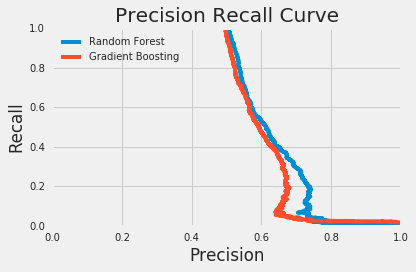

In [64]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test,
                                                               rf_pred)

plt.plot(precision_rf[:-1], recall_rf[:-1], label='Random Forest')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.tight_layout();

precision_gb, recall_gb, threshold_gb = precision_recall_curve(y_test, 
                                                               gb_pred)

plt.plot(precision_gb[:-1], recall_gb[:-1], label='Gradient Boosting')
# is number of ones - recall you are leaving behind.
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.tight_layout();

plt.legend(loc=2)

In [65]:
gb_model.feature_importances_

array([ 0.01739796,  0.01480213,  0.02061888,  0.02761202,  0.03700516,
        0.02734664,  0.02073337,  0.03019862,  0.02154348,  0.01883238,
        0.03851866,  0.01365964,  0.01463905,  0.03999557,  0.01324573,
        0.01094941,  0.01796836,  0.0228301 ,  0.02319627,  0.03209777,
        0.01410922,  0.00935193,  0.02727477,  0.01056785,  0.00707006,
        0.00739574,  0.02879252,  0.02995295,  0.02861096,  0.03064487,
        0.01522967,  0.01869939,  0.02519488,  0.02042349,  0.01781354,
        0.0139044 ,  0.0172021 ,  0.00783189,  0.01874778,  0.02543878,
        0.02098621,  0.01828699,  0.00910683,  0.01978577,  0.01326613,
        0.01032789,  0.02046789,  0.01582418,  0.01951562,  0.01498451])

In [66]:
accuracy_score(y_test , rf_pred > 0.5)

0.57703785142139152

In [69]:
accuracy_score(y_test, gb_pred > 0.5)

0.56887073975184543

### repeat this, but reduce the dimensions using the explained variance

In [38]:
rf_model_new = RandomForestClassifier(n_estimators=250, max_features='sqrt')
rf_model_new.fit(reduced_mat[:,:10], y_train);

In [39]:
rf_pred_new = rf_model_new.predict_proba(reduced_mat_test[:,:10])[:,1]

In [40]:
gb_model_new = RandomForestClassifier(n_estimators=250, max_features='sqrt')
gb_model_new.fit(reduced_mat[:,:10], y_train);

In [41]:
gb_pred_new = gb_model_new.predict_proba(reduced_mat_test[:,:10])[:,1]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


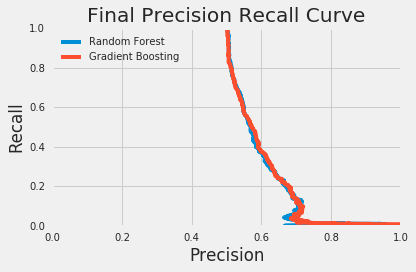

In [44]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test,
                                                               rf_pred_new)

plt.plot(precision_rf[:-1], recall_rf[:-1], label='Random Forest')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.tight_layout();

precision_gb, recall_gb, threshold_gb = precision_recall_curve(y_test, 
                                                               gb_pred_new)

plt.plot(precision_gb[:-1], recall_gb[:-1], label='Gradient Boosting')
# is number of ones - recall you are leaving behind.
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Final Precision Recall Curve')
plt.tight_layout();

plt.legend(loc=2)

In [45]:
accuracy_score(y_test, rf_pred_new > 0.5)

0.55819067064551597

In [46]:
accuracy_score(y_test, gb_pred_new > 0.5)

0.55929008952410864

In [ ]:
rf_model.feature_importances_

### Round 2

In [76]:
republican_accounts = ['realDonaldTrump', 'Reince', 'GOP', 
                       'seanhannity', 'tedcruz', 'SpeakerRyan', 
                       'AnnCoulter', 'oreillyfactor', 'FoxNews', 
                       'foxandfriends']
democratic_accounts = ['BarackObama', 'TheDemocrats', 'HillaryClinton',
                      'ObamaWhiteHouse', 'NancyPelosi', 'SenSanders',
                      'FLOTUS44', 'billmaher', 'jaketapper', 
                       'CNNPolitics']

In [77]:
republicans_new = db.republicans_new #create collections
democrats_new = db.democrats_new

In [78]:
twitter_accounts(democratic_accounts, democrats_new)


True

In [80]:
twitter_accounts(republican_accounts, republicans_new)

True

In [81]:
R_data = list(republicans_new.find({ }, { "text": 1, "_id": 0}))
#query MongoDB
D_data = list(democrats_new.find({ }, { "text": 1, "_id": 0}))
#query MongoDB

In [82]:
R_df = json_normalize(R_data) #normalize json to pandas DF
R_df['party'] = 'republican' #make another column so I know what party
R_df['party_num'] = 1
D_df = json_normalize(D_data) #normalize json to pandas DF
D_df['party'] = 'democrat' #make another column so I know what party
D_df['party_num'] = 0

In [83]:
df_new = pd.concat([R_df, D_df]).reset_index(drop=True) #bring them together.
df_new.head() #bring the two parties together

,text,party,party_num
0,Honored to meet this years @SenateYouth delega...,republican,1
1,Weekly Address - 11:00 A.M. at the @WhiteHouse...,republican,1
2,"RT @DRUDGE_REPORT: GREAT AGAIN: +235,000 http...",republican,1
3,"RT @foxandfriends: ""Never give up....that's th...",republican,1
4,'U.S. Consumer Comfort Just Reached Its Highes...,republican,1


In [88]:
df_new.shape

(63564, 3)

In [127]:
from sklearn.utils import shuffle
df_new = shuffle(df_new,random_state=42)
df_new = df_new.reset_index(drop=True)

In [128]:
df_train = df_new.iloc[:45000,:]
df_test = df_new.iloc[45000:,:].reset_index(drop=True)

In [129]:
df_test.shape

(18564, 3)

In [130]:
stringed_tweets1 = to_string(df_train['text'])
stringed_tweets2 = to_string(df_test['text'])

In [131]:
tfidf_mat_new = tfidf.fit_transform(stringed_tweets1)

In [132]:
lsa_new = TruncatedSVD(5, algorithm='randomized')
reduced_mat_new = lsa_new.fit_transform(tfidf_mat_new) #this fit_transform does:
#1) it learns a reduced matrix that maps topics to words
reduced_mat_new = Normalizer(copy=False).fit_transform(reduced_mat_new)
#2) it then applies this transformation and stores it, by norm of 1
#this is providing the TALL AND SKINNY MATRIX (docs by topics)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


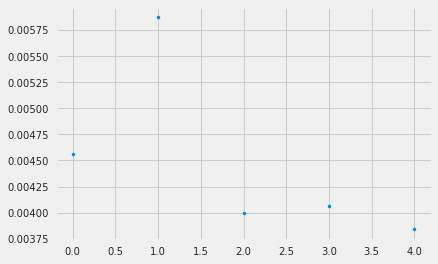

In [133]:
plt.plot(lsa_new.explained_variance_ratio_, '.')

In [134]:
#let's check out what the highest valued word is for each topic.
terms = np.array(tfidf.get_feature_names())

def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]
for i in range(5):
    print("topic {}".format(i))
    print(get_topical_terms(lsa_new.components_,i,terms, 20))
#somehow get rid of words like "https" and "rt"

topic 0
['http' 'president' 'trump' 'obama' 'amp' 'watch' 'hillary' 'tonight'
 'clinton' 'america' 'donald' 'people' 'today' 'new' 'potus' 'time'
 'americans' 'make' 'american' 'gop']
topic 1
['trump' 'president' 'donald' 'obama' 'people' 'potus' 'hannity' 'says'
 'america' 'realdonaldtrump' 'just' 'house' 'make' 'american' 'ban' 'going'
 'white' 'hillary' 'vote' 'travel']
topic 2
['trump' 'http' 'donald' 'tonight' 'points' 'president' 'memo' 'talking'
 'transcript' 'rush' 'factor' 'watch' 'video' 'obama' 'clip' 'hbo' 'ban'
 'travel' 'realtime' 'ly']
topic 3
['tonight' 'talking' 'points' 'memo' 'transcript' 'hillary' 'rush'
 'clinton' 'factor' 'll' 'thank' 'amp' 'debate' 'potus' 'don' 'great'
 'people' 'watch' 'vote' 'et']
topic 4
['president' 'obama' 'tonight' 'talking' 'points' 'memo' 'transcript'
 'rush' 'watch' 'potus' 'live' 'america' 'et' 'tune' 'people' 'today'
 'thank' 'great' 'american' 'address']


In [135]:
reduced_mat_new.shape

(45000, 5)

In [136]:
df_train

,text,party,party_num
0,"""Tim has led on some of the most important iss...",democrat,0
1,ISIS has infiltrated countries all over Europe...,republican,1
2,RT @Denis44: Where Americans get their health ...,democrat,0
3,"Unbelievable evening in Melbourne, Florida w/ ...",republican,1
4,Add your name to join the team fighting back a...,democrat,0
5,"From crime to the economy, participants in the...",republican,1
6,We need an attorney general to stand up to the...,democrat,0
7,LIVE: The President is holding a town hall mee...,democrat,0
8,Mexican officials tell the US: We don't agree ...,democrat,0
9,"RT @Hillary_esp: Según @NYTimes,Trump pudo hab...",democrat,0


In [137]:
rf1 = RandomForestClassifier(n_estimators=200, max_features='sqrt')
rf1.fit(reduced_mat_new[:,:50], df_train['party_num']);

In [138]:
test_matrix = tfidf.transform(df_test['text'])
reduced_test_matrix = lsa_new.transform(test_matrix)
reduced_test_matrix = Normalizer(copy=False).fit_transform(reduced_test_matrix)


In [139]:
y_pred = rf1.predict_proba(reduced_test_matrix)[:,1]

In [140]:
y_pred

array([ 0.285 ,  0.645 ,  0.295 , ...,  0.38  ,  0.665 ,  0.6865])

In [141]:
df_test['party_num'].describe()

count    18564.000000
mean         0.505117
std          0.499987
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: party_num, dtype: float64

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


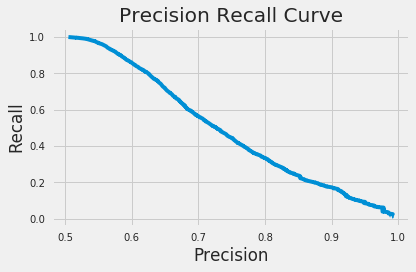

In [147]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(df_test['party_num'], 
                                                               y_pred)
                                                                       
plt.plot(precision_rf[:-1], recall_rf[:-1], label='Random Forest')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.tight_layout();

In [148]:
rf1.feature_importances_


array([ 0.17999236,  0.19885109,  0.1916244 ,  0.22572906,  0.20380309])

In [144]:
accuracy_score(df_test['party_num'], y_pred>.5)


0.66214177978883859

In [161]:
np.where(y_pred>.9)[0][:50]

array([  5,  45,  57,  66,  75,  78, 109, 113, 125, 169, 172, 179, 192,
       194, 221, 226, 248, 303, 326, 344, 356, 368, 413, 432, 449, 467,
       484, 487, 513, 545, 548, 571, 577, 582, 599, 628, 631, 660, 665,
       667, 671, 683, 686, 698, 757, 764, 768, 769, 771, 814])

In [156]:
df_test.text[57], df_test.party_num[57]

('RT @FreeBeacon: Chuck Todd: Hillary Clinton Likely to Say ‘Server Was Very Secure’ Despite Contrary Reports http://t.co/BnQOUxjQWi http://t…',
 1)

In [170]:
np.where(y_pred<.05)[0][:50]

array([ 147,  255,  274,  289,  298,  377,  378,  416,  423,  517,  530,
        576,  693,  885,  910,  990,  996, 1040, 1126, 1147, 1152, 1172,
       1244, 1264, 1276, 1283, 1354, 1355, 1402, 1425, 1495, 1499, 1589,
       1644, 1719, 1732, 1734, 1747, 1750, 1769, 1779, 1847, 1867, 1951,
       1953, 1967, 1989, 2000, 2023, 2036])

In [172]:
df_test.text[255], df_test.party_num[255]

('RT @PeaceCorpsDir: Excited to be at the #StateOfWomen Summit to talk about how @PeaceCorps is helping #LetGirlsLearn around the world https…',
 0)

In [186]:
np.where((y_pred>.999) & (df_test.party_num==1))[0] #CORRECT

array([   57,   194,   221,   368,   449,   660,   859,  1091,  1281,
        1358,  1426,  1476,  1657,  2024,  2155,  2279,  2291,  2615,
        2790,  2897,  3308,  3375,  3482,  3670,  4248,  4287,  5029,
        5252,  5451,  5540,  5676,  5924,  5967,  5981,  6155,  6431,
        6699,  6889,  7283,  7325,  7491,  7503,  7698,  8019,  8167,
        8474,  8545,  9191,  9412,  9583,  9632,  9765, 10249, 10830,
       10861, 11041, 11142, 11212, 11274, 11603, 11716, 11853, 12201,
       12208, 12358, 12597, 12722, 12779, 12930, 12999, 13223, 13260,
       13281, 13602, 13678, 13783, 13863, 13941, 14011, 14411, 14525,
       15237, 15252, 15502, 15520, 15681, 15939, 16576, 16703, 16737,
       16908, 16957, 17124, 17336, 17337, 17458, 17608, 17680, 17939,
       18135, 18140, 18181, 18449])

In [187]:
df_test.text[57], df_test.party_num[57] #WRONG

('RT @FreeBeacon: Chuck Todd: Hillary Clinton Likely to Say ‘Server Was Very Secure’ Despite Contrary Reports http://t.co/BnQOUxjQWi http://t…',
 1)

In [173]:
np.where((y_pred<.01) & (df_test.party_num==1))[0]

array([10117, 14244, 14824, 17965])

In [182]:
df_test.text[10117], df_test.party_num[10117] #WRONG

('President Obama blew threw another red line today, allowing Iranians to drag out talks over their nuclear program: http://t.co/2t24pjqhps',
 1)

In [183]:
df_test.text[14244] #WRONG

'"@HillaryClinton’s leaving a vacuum, and President Barack Obama’s going to try to fill it" in hopes of a 3rd term http://t.co/aEmTElL7qk'